# Phase 4 Code Challenge Review

TOC:

  - [PCA](#pca)
  - [NLP](#nlp)
  - [Time Series](#ts)  
  - [Clustering](#clust)


<a id='pca'></a>

# PCA

Principal Component Analysis creates a set of features called principal compenents. PCA reduces the dimensions of our data set from the original n number of features to a specified number of components.  

The components are built successively.  Describe what the first principal component represents in relation to the original feature set.

> Your answer here

==SOLUTION==

The first principal component points in the direction that explains the most variance of the original feature set.  Each principal component is composed of a combination of the original components. A larger weight in the first principal component indicates a larger variance in the original feature set.

Why is scaling important for PCA?

> Your answer here

==SOLUTION==

Scaling is important because variance in a feature measured in a relatively small unit can be just as or more important than a feature measured in a large unit.  In other words, the dependent variable may depend more on the feature with the smaller unit than the large.  When transforming a dataset with PCA, the PCA object finds the direction that explains the most total variance in the feature set.  It will then tend to identify features with larger units as the most important.  By scaling, the unit is taken out of the picture.  PCA will be able to identify features whose original scale is smaller, but whose variation correlates more closely with the dependent feature.  

Take for example a model that attempts to predict weight of a new born with age of the mother in years and height of the mother in meters.  Without scaling, the total variance of age across all subjects will be much greater than the total variance of height, simply because of the unit.  If one fits a PCA object to height and age, the first principal component will be more heavily influenced by age.  However, the height of the mother likely is a better predictor than age, but because of its relatively small variance in the original unit (meters), its influence is obscured. By scaling, PCA will consider the relative variance of height and age without regard for the unit. 


What are some reasons for using PCA?


> Your answer here

==SOLUTION==

1. PCA can speed up computation time. 
2. PCA can help with overfitting and decrease the overall prediction error of the model.
3. A similar advantage to #2 is that PCA eliminates multicollinearity.  Because each component is built orthogonally to the last, all multicollinearity is eliminated.  
4. PCA can be used for visualization.  Reducing the original data set to two dimensions allows a representation of the data to be plotted on an x-y plane.


How can one determine how many principle components to use in a model?

> Your answer here

==SOLUTION==
Each successive principal component explains a different aspect of the variance of the feature set.  After the PCA object has been fit, it has an attribute named explained_variance_ratio, which describes what percentage of the variance is explained by each component.  The first component will have the largest value for explained variance ratio.  And the variance explained will decrease with each successive component. At some point, adding another principal component will result in only a small additional percent of variance explained.  Looking at a graph of the number of components vs. cumulative explained variance ratio, the curve will stop increasing significantly and start to level off.  A good choice for the number of principal components would be the component after which a significant increase of explained variance stops.

The PCA object can also be given a proportion as the argument p_components.  PCA will stop after that decimal.  If .8 is given, PCA will stop adding components after the previous components have explained 80% of the variance.

# Now let's implement PCA in code.

In [114]:
import pandas as pd
from sklearn.datasets import  load_breast_cancer
import matplotlib.pyplot as plt

data = load_breast_cancer()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [68]:
# appropriately preprocess X

In [69]:
# instantiate a pca object with 2 components and fit to preprocessed X

In [70]:
# determine how much of the total variance is explained by the first two components

In [71]:
#__SOLUTION__
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Scale the independent features
ss = StandardScaler()
ss.fit(X)

X_sc = ss.transform(X)

# instanstiate a pca object with 2 components
pca = PCA(n_components=2)

#fit to preprocessed X
pca.fit(X_sc)

print(sum(pca.explained_variance_ratio_))
print('The first two principal components explain about 63% of the variance')

0.6324320765155944
The first two principal components explain about 63% of the variance


<a id='nlp'></a>


# NLP

In [72]:
# Each sentence is a document
sentence_one = "Harry Potter is the best young adult book about wizards"
sentence_two = "Um, EXCUSE ME! Ever heard of Earth Sea?"
sentence_three = "I only like to read non-fiction.  It makes me a better person."

# The corpus is composed of all of the documents
corpus = [sentence_one, sentence_two, sentence_three]

Describe what preproccessing steps to take in order to isolate the semantically valuable components of the corpus.

==SOLUTION==
1. Remove punctuation.
2. Make all tokens lowercase.
3. Remove stop words. 
4. Stem and lemmatize. 

Describe the rows and columns of the document term matrix that would result from vectorizing the above corpus. 

==SOLUTION==

In the document term matrix, each row would represent a sentence.  There would be as many columns as there are tokens, after preprocessing, accross the entire corpus.  


Describe what the values within the document-term matrix could be.

==SOLUTION==

The values are some representation of frequency.  If a count vectorizor is used, the values are counts of how many times a given word occurs in a sentence. 

Describe how to calculate a TF-IDF score.

==SOLUTION==

The term frequency component of TFIDF counts the number of times a term shows up in a given document. This number is multiplied by the inverse document frequency. IDF is calculated as the log of the total number of documents divided by the number of documents the term appears in. If the term appears in less documents, the IDF score will be larger. 

# NLP Code

In [73]:
# data import
policies = pd.read_csv('data/2020_policies_feb_24.csv')

def warren_not_warren(label):
    
    '''Make label a binary between Elizabeth Warren
    speeches and speeches from all other candidates'''
    
    if label =='warren':
        return 1
    else:
        return 0
    
policies['candidate'] = policies['candidate'].apply(warren_not_warren)

The dataframe loaded above consists of policies of 2020 Democratic presidential hopefuls. The `policy` column holds text describing the policies themselves.  The `candidate` column indicates whether it was or was not an Elizabeth Warren policy.

In [74]:
policies.head()

,Unnamed: 0,name,policy,candidate
0,0,100% Clean Energy for America,"As published on Medium on September 3rd, 2019:...",1
1,1,A Comprehensive Agenda to Boost America’s Smal...,Small businesses are the heart of our economy....,1
2,2,A Fair and Welcoming Immigration System,"As published on Medium on July 11th, 2019:\nIm...",1
3,3,A Fair Workweek for America’s Part-Time Workers,Working families all across the country are ge...,1
4,4,A Great Public School Education for Every Student,I attended public school growing up in Oklahom...,1


The documents for activity are in the `policy` column, and the target is candidate. 

In [75]:
# split into train and test set with default arguments and random_state=42
# note: for demonstration purposes, we will not use cross-validation here nor a holdout set.
# note: whether you pass an array or a dataframe to as the feature set will change how it is
# passed to the vectorizer

In [76]:
#__SOLUTION__
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(policies['policy'], policies['candidate'], 
                                                   random_state=42)

In [77]:
# Import and instantiate a Count Vectorizer with defaults

In [78]:
#__SOLUTION__
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()


In [79]:
# Transform train and test sets with the Count Vectorizer
# then fit a logistic regression model on it.
# if you get the AttributeError: 'str' object has no attribute 'decode', pass solver='liblinear'

In [80]:
#__SOLUTION__
from sklearn.linear_model import LogisticRegression

cv.fit(X_train)
X_train_cv = cv.transform(X_train)
X_test_cv = cv.transform(X_test)

lr = LogisticRegression(solver='liblinear')
lr.fit(X_train_cv, y_train)

LogisticRegression(solver='liblinear')

In [81]:
# Score on both train and test sets.

In [82]:
#__SOLUTION__
print(lr.score(X_train_cv, y_train))
print(lr.score(X_test_cv, y_test))

1.0
0.8958333333333334


In [83]:
# Tune some hyperparameters of the vectorizer and assess the performance

In [84]:
#__SOLUTION__
def htune_cv(cv, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):
    
    '''Pass in a vectorizer with a set of hyperameters
    and print the train and test scores of a logistic
    model fit on a vectorized version of X.
    '''
    
    cv.fit(X_train)
    X_train_cv = cv.transform(X_train)
    X_test_cv = cv.transform(X_test)

    lr = LogisticRegression(solver='liblinear')

    lr.fit(X_train_cv, y_train)
    print(lr.score(X_train_cv, y_train))
    print(lr.score(X_test_cv, y_test))

In [85]:
#__SOLUTION__
cv = CountVectorizer(stop_words='english')
htune_cv(cv)

1.0
0.8958333333333334


In [86]:
#__SOLUTION__
cv = CountVectorizer(stop_words='english', max_features=100)
htune_cv(cv)

1.0
0.9166666666666666


<a id='ts'></a>

# Time Series

In [103]:
import pandas as pd
import numpy as np

In [104]:
ap = pd.read_csv('data/AirPassengers.csv')

With the data above, what is the first step in transforming it into data suitable for our time series models?

> Your answer here

==SOLUTION==
Convert the index to a datetime index.

In [105]:
# Perform that step in code

In [106]:
ap.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [107]:
#__SOLUTION__
ap['Month'] = pd.to_datetime(ap['Month'])
ap.set_index('Month', inplace=True)
ap.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


What types of patterns might we expect to find in our time series datasets?

==SOLUTION==
1. Increasing or descreasing mean over time. 
2. Variance is different across different time periods (homo/heteroskedacicity).
3. Covariance should not be a function of time.
4. Seasonality: Cycle of repeated pattern over a period: Week, month, year. 

In [ ]:
# plot the time series

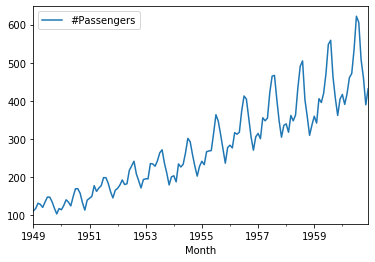

In [108]:
#__SOLUTION__
ap.plot()

What type of patterns do you see in the above plot?

> Your answer here

==SOLUTION==
Increasing mean. 
Increasing variance. 
Seasonality with peak in the summer. 

In [ ]:
# Add to the plot to visualize patterns by looking at summary statistics across a window of time.

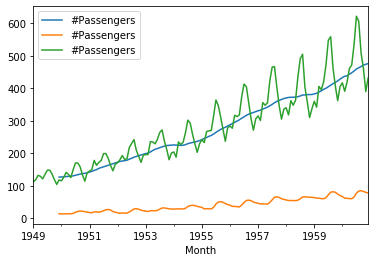

In [116]:
#__SOLUTION__
fig, ax = plt.subplots()
ap.rolling(12).mean().plot(ax=ax)
ap.rolling(12).std().plot(ax=ax)
ap.plot(ax=ax)

What are some ways to remove those trends? 

> Your answer here

==SOLUTION==
1. Differencing: Subtracting the previous value from the current value.
2. Use statsmodels seasonal decompose. 
3. Subtracting the rolling mean. Log transform. Take the square root.  

Attempt to make the series stationary using differencing

In [ ]:
# your code here

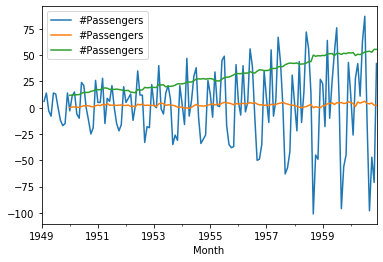

In [131]:
#__SOLUTION__
fig, ax = plt.subplots()
ap.diff().plot(ax=ax)
ap.diff().rolling(window=12).mean().plot(ax=ax)
ap.diff().rolling(window=12).std().plot(ax=ax)

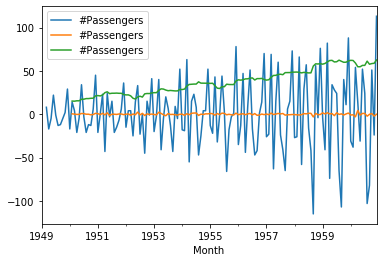

In [133]:
#__SOLUTION__
fig, ax = plt.subplots()
ap.diff().diff().plot(ax=ax)
ap.diff().diff().rolling(12).mean().plot(ax=ax)
ap.diff().diff().rolling(12).std().plot(ax=ax)

How can we diagnose whether we have successfully removed the trends?

> Your answer here

==SOLUTION==

Visually: we can plot the rolling mean and standard deviation along with the differenced time series.
Analytically: we can run an augmented Dickey Fuller test to check for trend over time.   If we reject the null hypothesis, we reject that the series is non-stationary.

Use the Augmented Dickey Fuller test to see if the detrended data is ready for modeling

In [ ]:
# your code here

In [142]:
#__SOLUTION__
from statsmodels.tsa.stattools import adfuller

adfuller(ap.diff().diff().dropna())

# note: dickey fuller test does not check for variance or seasonality 
# Although we can reject the null hypothesis, we know there is still increasing variance 
# and seasonality present.
# [stack_overflow](https://stats.stackexchange.com/questions/131054/does-stationarity-under-adf-test-imply-mean-variance-and-covariance-stationary)

(-16.384231542468488,
 2.7328918500143186e-29,
 11,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 988.6020417275604)

<a id='clust'></a>

# Clustering

Question: What is the difference between supervised and unsupervised learning?

> Your answer here

Describe how the kmeans algorithm updates its cluster centers after initialization.

> Your answer here

What is inertia, and how does kmeans use inertia to determine the best estimator?

> Your answer here

In [ ]:
from sklearn.cluster import KMeans

KMeans()

What other metric do we have to score the clusters which are formed?

Describe the difference between it and inertia.

> Your answer here

# Code Cluster Practice with Heirarchical Agglomerative Clustering

After the above conceptual review of KMeans, let's practice coding with agglomerative clustering.

In [ ]:
from sklearn.datasets import load_iris

data = load_iris()
X = pd.DataFrame(data['data'])
y = data['target']

In [ ]:
# Import the relevent clusterer and instantiate an instance of it. 
# Indicate the number of clusters you want

In [ ]:
# Preprocess the data

In [ ]:
# Fit the object

In [ ]:
# Calculate a silhouette score

In [ ]:
# Repeat with another choice for number of clusters

In [ ]:
# Determine which is a better number

# Bonus: Use PCA to visualize in two dimensions the cluster groups of the best metric.

In [ ]:
# your code here